In [3]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import DataFrame, concat
import pandas as pd
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [330]:
file_path = r'D:\project-rice-yield-prediction\datasets and notes\BD-rice(ok).xlsx'
df= pd.read_excel(file_path,sheet_name='Aman',skiprows=1)

In [331]:
df

,rice,year,district,weather district,division,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,Aman,2006,Bagerhat,Khulna,Khulna,0.728570,16.838710,11.741935,0.033333,0.000000,28.9,28.7,24.1,20.2
1,Aman,2007,Bagerhat,Khulna,Khulna,0.522331,19.064516,5.161290,3.766667,0.000000,28.6,29.3,24.2,19.1
2,Aman,2008,Bagerhat,Khulna,Khulna,0.663455,9.709677,6.516129,0.000000,0.000000,28.5,29.0,24.1,20.6
3,Aman,2009,Bagerhat,Khulna,Khulna,0.769729,11.193548,18.322581,0.666667,0.000000,29.0,29.0,24.5,19.3
4,Aman,2010,Bagerhat,Khulna,Khulna,0.710355,5.806452,6.612903,0.000000,0.419355,29.6,29.7,25.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Aman,2017,Thakurgaon,Dinajpur,Rangpur,1.138931,6.290323,21.129032,0.000000,0.000000,29.3,29.6,22.1,19.2
1319,Aman,2018,Thakurgaon,Dinajpur,Rangpur,1.159884,5.322581,5.290323,0.000000,0.322581,29.9,30.1,21.8,17.3
1320,Aman,2019,Thakurgaon,Dinajpur,Rangpur,1.170860,21.935484,10.580645,0.000000,0.000000,29.4,30.4,23.2,16.5
1321,Aman,2020,Thakurgaon,Dinajpur,Rangpur,1.083696,19.935484,10.258065,0.100000,0.000000,28.9,30.2,22.0,17.7


In [332]:
# Filter out the yield data
data = df[df['yield'].notnull()]

In [333]:
data

,rice,year,district,weather district,division,yield,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,Aman,2006,Bagerhat,Khulna,Khulna,0.728570,16.838710,11.741935,0.033333,0.000000,28.9,28.7,24.1,20.2
1,Aman,2007,Bagerhat,Khulna,Khulna,0.522331,19.064516,5.161290,3.766667,0.000000,28.6,29.3,24.2,19.1
2,Aman,2008,Bagerhat,Khulna,Khulna,0.663455,9.709677,6.516129,0.000000,0.000000,28.5,29.0,24.1,20.6
3,Aman,2009,Bagerhat,Khulna,Khulna,0.769729,11.193548,18.322581,0.666667,0.000000,29.0,29.0,24.5,19.3
4,Aman,2010,Bagerhat,Khulna,Khulna,0.710355,5.806452,6.612903,0.000000,0.419355,29.6,29.7,25.1,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,Aman,2017,Thakurgaon,Dinajpur,Rangpur,1.138931,6.290323,21.129032,0.000000,0.000000,29.3,29.6,22.1,19.2
1319,Aman,2018,Thakurgaon,Dinajpur,Rangpur,1.159884,5.322581,5.290323,0.000000,0.322581,29.9,30.1,21.8,17.3
1320,Aman,2019,Thakurgaon,Dinajpur,Rangpur,1.170860,21.935484,10.580645,0.000000,0.000000,29.4,30.4,23.2,16.5
1321,Aman,2020,Thakurgaon,Dinajpur,Rangpur,1.083696,19.935484,10.258065,0.100000,0.000000,28.9,30.2,22.0,17.7


In [334]:
# Dropping the specified columns
data_dropped = data.drop(columns=['rice', 'weather district', 'division'])

# Display the remaining columns
print(data_dropped.columns)


Index(['year', 'district', 'yield', 'precip_1', 'precip_2', 'precip_5',
       'precip_6', 'temp_1', 'temp_2', 'temp_5', 'temp_6'],
      dtype='object')


# Districts Starting in 1993 (after forward padding for 2006-)

In [336]:
df_1993 = pd.DataFrame(data_dropped)

# Workflow 2: Forward Padding for districts starting from 1993
start_1993 = df_1993[df_1993['year'] <= 1993].groupby('district')

# Create missing rows for years 2006-2021 for districts starting in 1993
for district, group in start_1993:
    missing_years = pd.DataFrame({
        'district': [district] * (2022 - 2006),
        'year': list(range(2006, 2022)),
        'yield': [group['yield'].iloc[-1]] * (2022 - 2006),  # Forward fill from 1993 or last available year
        'precip_1': [group['precip_1'].iloc[-1]] * (2022 - 2006),
        'precip_2': [group['precip_2'].iloc[-1]] * (2022 - 2006),
        'precip_5': [group['precip_5'].iloc[-1]] * (2022 - 2006),
        'precip_6': [group['precip_6'].iloc[-1]] * (2022 - 2006),
        'temp_1': [group['temp_1'].iloc[-1]] * (2022 - 2006),
        'temp_2': [group['temp_2'].iloc[-1]] * (2022 - 2006),
        'temp_5': [group['temp_5'].iloc[-1]] * (2022 - 2006),
        'temp_6': [group['temp_6'].iloc[-1]] * (2022 - 2006)
    })
    # Append the missing years back to the original dataframe
    df_1993 = pd.concat([df_1993, missing_years], ignore_index=True)

# Sort the dataframe by district and year for clear order
df_1993 = df_1993.sort_values(by=['district', 'year']).reset_index(drop=True)

print(df_1993)





      year    district     yield   precip_1   precip_2  precip_5  precip_6  \
0     2006    Bagerhat  0.728570  16.838710  11.741935  0.033333  0.000000   
1     2007    Bagerhat  0.522331  19.064516   5.161290  3.766667  0.000000   
2     2008    Bagerhat  0.663455   9.709677   6.516129  0.000000  0.000000   
3     2009    Bagerhat  0.769729  11.193548  18.322581  0.666667  0.000000   
4     2010    Bagerhat  0.710355   5.806452   6.612903  0.000000  0.419355   
...    ...         ...       ...        ...        ...       ...       ...   
1686  2017  Thakurgaon  1.138931   6.290323  21.129032  0.000000  0.000000   
1687  2018  Thakurgaon  1.159884   5.322581   5.290323  0.000000  0.322581   
1688  2019  Thakurgaon  1.170860  21.935484  10.580645  0.000000  0.000000   
1689  2020  Thakurgaon  1.083696  19.935484  10.258065  0.100000  0.000000   
1690  2021  Thakurgaon  1.163123   5.806452  13.129032  0.000000  0.161290   

      temp_1  temp_2  temp_5  temp_6  
0       28.9    28.7    

In [340]:
# Set 'district' and 'year' as the index and keep the necessary columns
yield_data = df_1993.set_index(['district', 'year'])[['yield','precip_1', 'precip_2', 'precip_5', 'precip_6', 
                                               'temp_1', 'temp_2', 'temp_5', 'temp_6',]]

# Display the reshaped DataFrame
yield_data.head()


yield   precip_1   precip_2  precip_5  precip_6  temp_1  \
district year                                                               
Bagerhat 2006  0.728570  16.838710  11.741935  0.033333  0.000000    28.9   
         2007  0.522331  19.064516   5.161290  3.766667  0.000000    28.6   
         2008  0.663455   9.709677   6.516129  0.000000  0.000000    28.5   
         2009  0.769729  11.193548  18.322581  0.666667  0.000000    29.0   
         2010  0.710355   5.806452   6.612903  0.000000  0.419355    29.6   

               temp_2  temp_5  temp_6  
district year                          
Bagerhat 2006    28.7    24.1    20.2  
         2007    29.3    24.2    19.1  
         2008    29.0    24.1    20.6  
         2009    29.0    24.5    19.3  
         2010    29.7    25.1    19.3

In [341]:
yield_data.shape

(1691, 9)

In [342]:
# Group the data by 'district' and sum the 'yield' for each district
top_10_districts = pd.DataFrame(yield_data.groupby('district')['yield'].sum()).sort_values(by='yield', ascending=False).reset_index()

# Get the names of the top 10 districts
top_10_district_names = top_10_districts['district'][:10]
top_10_district_names


0      Bandarban
1    Khagrachari
2     Chittagong
3      Rangamati
4          Bogra
5        Kushtia
6       Rajshahi
7        Jessore
8        Rangpur
9    Kishoregonj
Name: district, dtype: object

In [343]:
top_10_districts.head(10)

,district,yield
0,Bandarban,45.977189
1,Khagrachari,45.689680
2,Chittagong,45.485076
3,Rangamati,44.383538
4,Bogra,40.308618
5,Kushtia,39.901114
6,Rajshahi,39.757104
7,Jessore,39.652515
8,Rangpur,39.315130
9,Kishoregonj,38.384543


# Data Standardization


In [347]:
# Normalize the data: Drop the target variable 'yield' and categorical columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(yield_data.drop(columns=['yield']))

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(data=scaled, columns=yield_data.drop(columns=['yield']).columns)

In [348]:
# Check the normalized data
scaled_df.head()

,precip_1,precip_2,precip_5,precip_6,temp_1,temp_2,temp_5,temp_6
0,0.293917,0.245844,0.002740,0.000000,0.617647,0.484848,0.681818,0.571429
1,0.341080,0.067367,0.309589,0.000000,0.529412,0.666667,0.693182,0.428571
2,0.142857,0.104112,0.000000,0.000000,0.500000,0.575758,0.681818,0.623377
3,0.174299,0.424322,0.054795,0.000000,0.647059,0.575758,0.727273,0.454545
4,0.060150,0.106737,0.000000,0.067358,0.823529,0.787879,0.795455,0.454545


In [350]:
# Create a copy of the original DataFrame
yield_data_scaled = yield_data.copy()

# Replace the relevant columns with the scaled values
yield_data_scaled[scaled_df.columns] = np.array(scaled_df)

# Set the index of the DataFrame to 'district' and 'year'
yield_data_scaled = yield_data_scaled.reset_index().set_index(['district', 'year'])

# Display the first few rows of the updated DataFrame
yield_data_scaled.head()


yield  precip_1  precip_2  precip_5  precip_6    temp_1  \
district year                                                               
Bagerhat 2006  0.728570  0.293917  0.245844  0.002740  0.000000  0.617647   
         2007  0.522331  0.341080  0.067367  0.309589  0.000000  0.529412   
         2008  0.663455  0.142857  0.104112  0.000000  0.000000  0.500000   
         2009  0.769729  0.174299  0.424322  0.054795  0.000000  0.647059   
         2010  0.710355  0.060150  0.106737  0.000000  0.067358  0.823529   

                 temp_2    temp_5    temp_6  
district year                                
Bagerhat 2006  0.484848  0.681818  0.571429  
         2007  0.666667  0.693182  0.428571  
         2008  0.575758  0.681818  0.623377  
         2009  0.575758  0.727273  0.454545  
         2010  0.787879  0.795455  0.454545

#  Train Test Split

In [351]:
# Function to split the data into train and test sets
def train_test_split(data):
    # Calculate the size of the training set (80% of the data)
    size = int(len(data) * 0.8)

    # For train data, collect 80% of the data, dropping the target variable 'yield'
    x_train = data.drop(columns=['yield']).iloc[0:size]
    
    # For test data, collect the remaining 20% of the data
    x_test = data.drop(columns=['yield']).iloc[size:]

    # Define the target variable for training and testing
    y_train = data['yield'].iloc[0:size]
    y_test = data['yield'].iloc[size:]

    return x_train, x_test, y_train, y_test


In [352]:
yield_data_scaled.shape

(1691, 9)

In [353]:
# Get unique districts
districts = yield_data_scaled.index.levels[0]  # Get the unique districts from the first level of the index



# Initialize empty lists for training and testing data
X_train = []
X_test = []
Y_train = []
Y_test = []

for district in districts:
    data = yield_data_scaled.xs(district, level='district')  # Get data for the current district
    
    # Optionally, reset the index and add the district back
    data_reset = data.reset_index()  # This will make 'year' a column
    data_reset['district'] = district  # Add the district back as a column
    data_reset = data_reset.set_index(['district', 'year'])  # Set the index back to district and year

    # Apply the function to split the data
    x_train, x_test, y_train, y_test = train_test_split(data_reset) 
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)




In [354]:
X_train[0].head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 2006  0.293917  0.245844  0.002740  0.000000  0.617647  0.484848   
         2007  0.341080  0.067367  0.309589  0.000000  0.529412  0.666667   
         2008  0.142857  0.104112  0.000000  0.000000  0.500000  0.575758   
         2009  0.174299  0.424322  0.054795  0.000000  0.647059  0.575758   
         2010  0.060150  0.106737  0.000000  0.067358  0.823529  0.787879   

                 temp_5    temp_6  
district year                      
Bagerhat 2006  0.681818  0.571429  
         2007  0.693182  0.428571  
         2008  0.681818  0.623377  
         2009  0.727273  0.454545  
         2010  0.795455  0.454545

In [355]:
Y_train[0].head()

district  year
Bagerhat  2006    0.728570
          2007    0.522331
          2008    0.663455
          2009    0.769729
          2010    0.710355
Name: yield, dtype: float64

In [356]:
# concatenate each train dataset in X_train list and Y_train list respectively 
X_train=pd.concat(X_train)
Y_train=pd.DataFrame(pd.concat(Y_train))
# concatenate each test dataset in X_test list and Y_test list respectively
X_test=pd.concat(X_test)
Y_test=pd.DataFrame(pd.concat(Y_test))

In [357]:
# double check the train data and test data and our target 
X_train.head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 2006  0.293917  0.245844  0.002740  0.000000  0.617647  0.484848   
         2007  0.341080  0.067367  0.309589  0.000000  0.529412  0.666667   
         2008  0.142857  0.104112  0.000000  0.000000  0.500000  0.575758   
         2009  0.174299  0.424322  0.054795  0.000000  0.647059  0.575758   
         2010  0.060150  0.106737  0.000000  0.067358  0.823529  0.787879   

                 temp_5    temp_6  
district year                      
Bagerhat 2006  0.681818  0.571429  
         2007  0.693182  0.428571  
         2008  0.681818  0.623377  
         2009  0.727273  0.454545  
         2010  0.795455  0.454545

In [358]:
X_train.shape

(1320, 8)

# Data Preprocessing

In [359]:
# Code Source: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# create the reshape function
def reshape_data(train,test):
    #Frame as supervised learning and drop all time t columns except
    reframed_train = series_to_supervised(train, 1, 1)
    reframed_test = series_to_supervised(test, 1, 1)
    # split into train and test sets
    train= reframed_train.values
    test=reframed_test.values
    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return x_train,x_test,y_train,y_test

In [360]:
encoder = LabelEncoder()
#combine X train and Y train as train data 
train_data=pd.DataFrame()
train_data[X_train.columns]=X_train
train_data[Y_train.columns]=Y_train

#combine X test and Y test as test data 
test_data=pd.DataFrame()
test_data[X_test.columns]=X_test
test_data[Y_test.columns]=Y_test


In [361]:
train_data.head()

precip_1  precip_2  precip_5  precip_6    temp_1    temp_2  \
district year                                                               
Bagerhat 2006  0.293917  0.245844  0.002740  0.000000  0.617647  0.484848   
         2007  0.341080  0.067367  0.309589  0.000000  0.529412  0.666667   
         2008  0.142857  0.104112  0.000000  0.000000  0.500000  0.575758   
         2009  0.174299  0.424322  0.054795  0.000000  0.647059  0.575758   
         2010  0.060150  0.106737  0.000000  0.067358  0.823529  0.787879   

                 temp_5    temp_6     yield  
district year                                
Bagerhat 2006  0.681818  0.571429  0.728570  
         2007  0.693182  0.428571  0.522331  
         2008  0.681818  0.623377  0.663455  
         2009  0.727273  0.454545  0.769729  
         2010  0.795455  0.454545  0.710355

In [362]:
# using the function to obtian reshaped x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)

In [4]:
LSTM?

Init signature:
LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    seed=None,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    use_cudnn='auto',
    **kwargs,
)
Docstring:     
Long Short-Term Memory layer - Hochreiter 1997.

Based on available runtime hardware and constraints, this layer
will choose different implementations (cuDNN-based or backend-native)
to maximize the performance. If a GPU is available and all
the arguments to the layer meet the requirement of the cuDNN kernel
(see below

In [363]:
# design network for confirmed cases data 
model = Sequential()
model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)

C:\Users\88017\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7559
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4333
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1879
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1812
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1795
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1775
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1755
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1736
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1718
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1699
Epoch 11/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1681
Epoch 12/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1661
Epoch 13/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1641
Epoch 14/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1619
Epoch 15/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1596
Epoch 16/30
27/27 ━

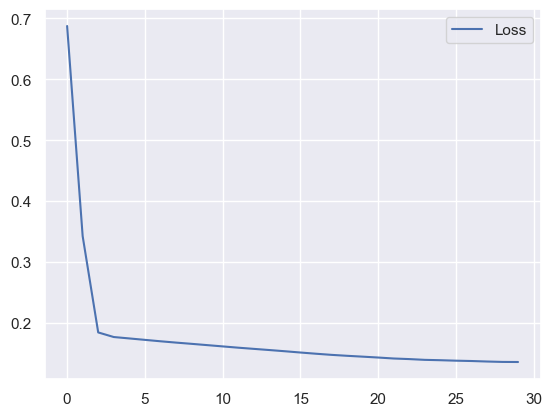

In [364]:
# plot history
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

# Make prediction

In [365]:
# make a prediction
y_test_pre=model.predict(x_test)
# check length
y_test_pre.shape,y_test.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


((370, 1), (370,))

# Model Evaluation

In [367]:
pa=pd.DataFrame()
pa['year']=X_test.reset_index().year.iloc[1:-1]
pa['Prediction']=[i[0] for i in y_test_pre][1:] 
pa['Actual Values']=y_test[:-1]
pa.head()

,year,Prediction,Actual Values
1,2019,0.763742,0.817027
2,2020,0.815280,0.851027
3,2021,0.619455,0.894754
4,2017,0.918680,0.981077
5,2018,0.820970,1.079489


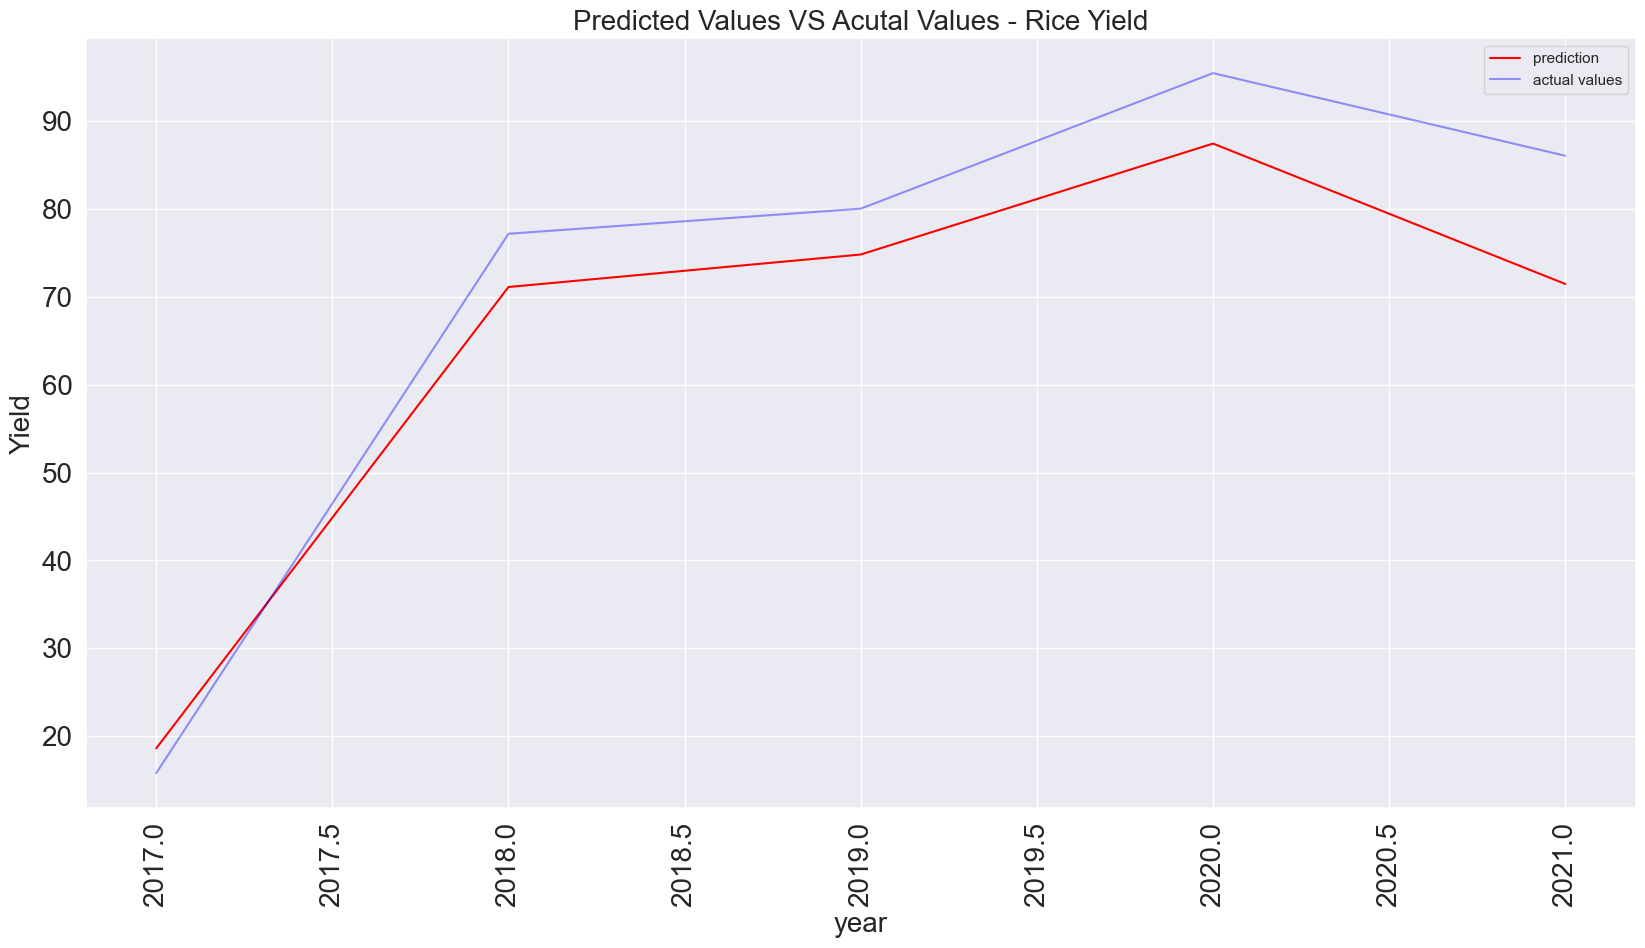

In [368]:
plt.figure(figsize=(20,10))
pa.groupby('year')['Prediction'].sum().plot(kind='line',label='prediction',color='red',alpha=1)
pa.groupby("year")['Actual Values'].sum().plot(kind='line',label='actual values',color='blue',alpha=0.4)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

plt.ylabel('Yield',fontsize=20)
plt.xlabel('year',fontsize=20)
plt.title('Predicted Values VS Acutal Values - Rice Yield',fontsize=20)
plt.legend()

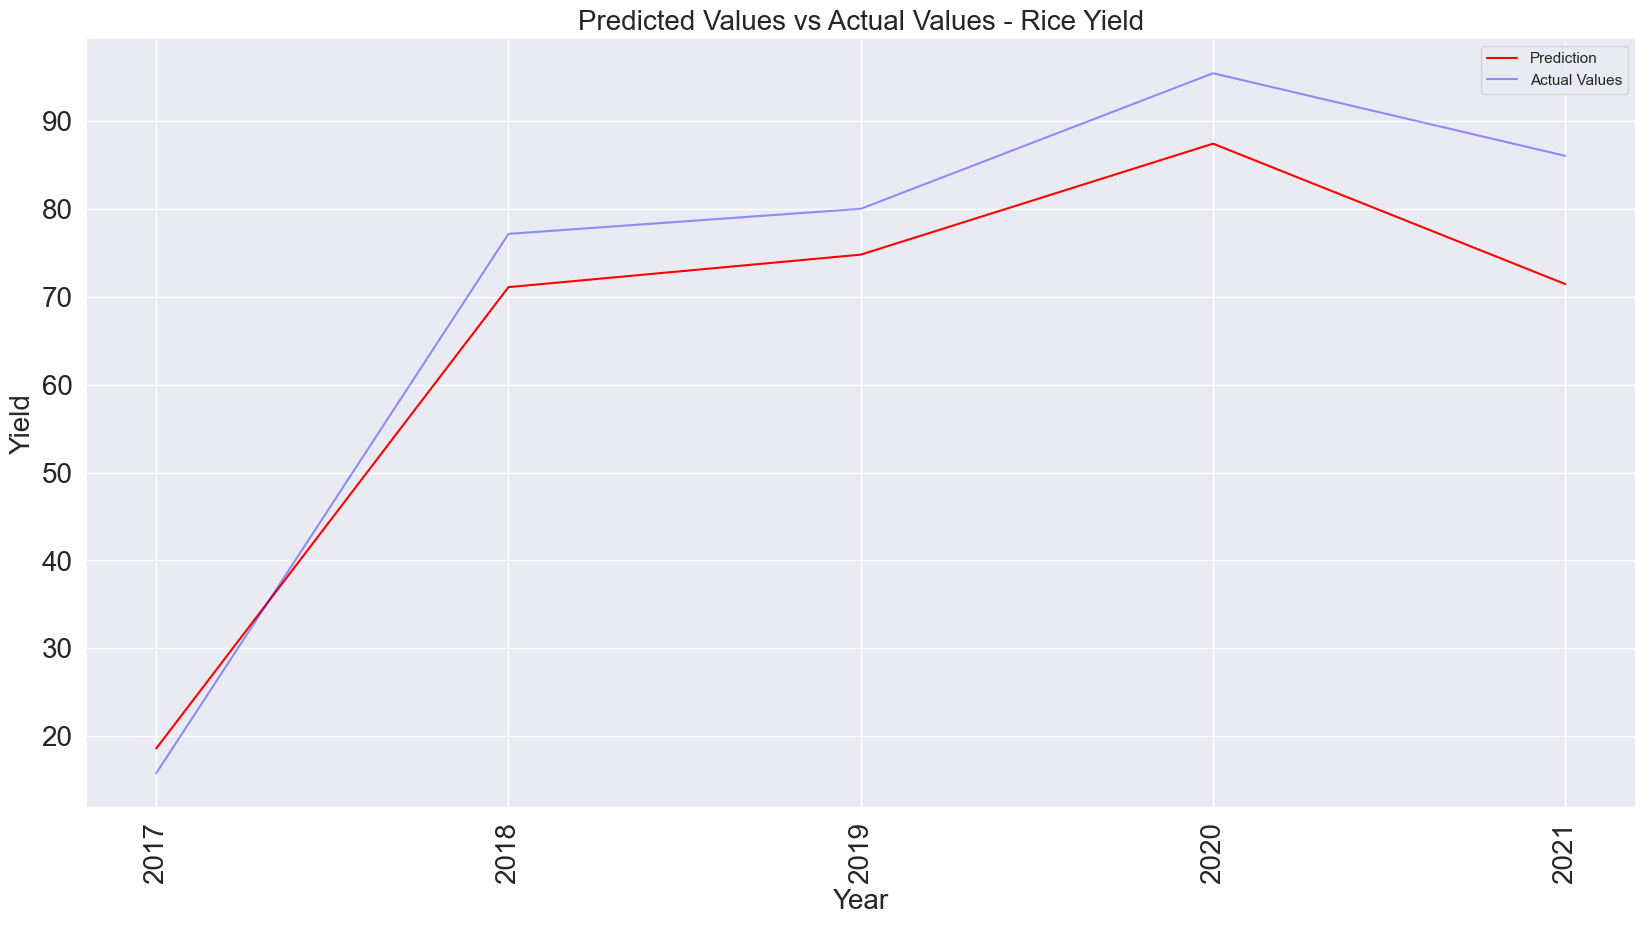

In [369]:
import matplotlib.pyplot as plt

# Ensure the 'year' column is of integer type
pa['year'] = pa['year'].astype(int)

plt.figure(figsize=(20,10))

# Plot predictions and actual values, grouped by year
pa.groupby('year')['Prediction'].sum().plot(kind='line', label='Prediction', color='red', alpha=1)
pa.groupby('year')['Actual Values'].sum().plot(kind='line', label='Actual Values', color='blue', alpha=0.4)

# Set x-axis ticks to be the unique year values as integers
plt.xticks(ticks=pa['year'].unique(), rotation=90, size=20)
plt.yticks(size=20)

plt.ylabel('Yield', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title('Predicted Values vs Actual Values - Rice Yield', fontsize=20)
plt.legend()

plt.show()


In [370]:
def RMSE(actual,prediction):
    rmse = np.sqrt(mean_squared_error(actual,prediction))
    return rmse

In [371]:
print(RMSE(y_test[:-1],[i[0] for i in y_test_pre][1:]))

0.23700703577041435


In [170]:
from sklearn.metrics import mean_squared_error
import numpy as np

def RMSE(actual, prediction):
    rmse = np.sqrt(mean_squared_error(actual, prediction))
    return rmse

# Example usage with your dataset:
rmse_value = RMSE(pa['Actual Values'], pa['Prediction'])
print(f"RMSE: {rmse_value}")


RMSE: 0.14655285175965324


# 6.4. LSTM for top 10 contries


# trial